In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.style.use('ggplot')

In [2]:
cleaned=pd.read_csv("C:/Users/avakk/Downloads/updatedcleanedData.csv")

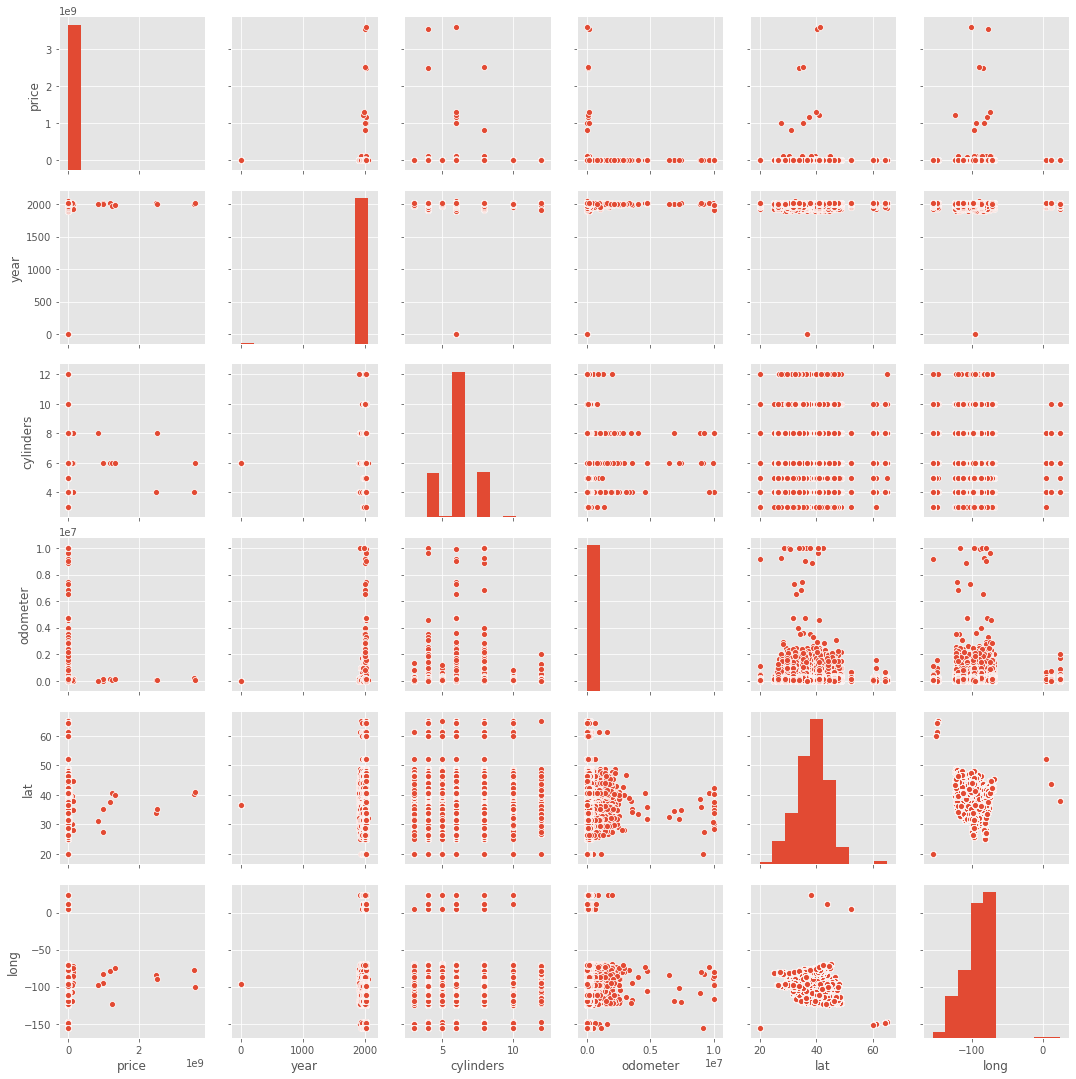

In [3]:
sns.pairplot(cleaned.loc[:,"price":"long"])
plt.show()

,price,year,cylinders,odometer,lat,long
price,1.000000,0.000194,-0.000624,-0.000881,-0.000797,0.000720
year,0.000194,1.000000,-0.010322,0.041828,0.019225,0.005613
cylinders,-0.000624,-0.010322,1.000000,0.064841,-0.007618,-0.000023
odometer,-0.000881,0.041828,0.064841,1.000000,-0.005574,0.041370
lat,-0.000797,0.019225,-0.007618,-0.005574,1.000000,-0.092018
long,0.000720,0.005613,-0.000023,0.041370,-0.092018,1.000000


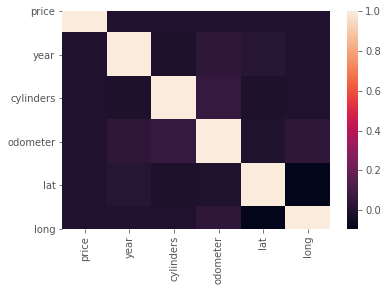

In [4]:
sns.heatmap(cleaned.loc[:,"price":"long"].corr())
cleaned.loc[:,"price":"long"].corr()